# Bibliotecas utilizadas

In [1]:
#!pip3 install wordcloud
from urllib.request import urlopen
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import warnings
warnings.filterwarnings("ignore")

# URL escolhida para baixar as notícias

In [2]:
URL = "https://g1.globo.com/rss/g1/educacao/"

# Abrindo o site, armazenando na variável xml e fechando o site

In [3]:
site = urlopen(URL)
xml = site.read()
site.close()

# Verificando o conteúdo da variável xml

In [4]:
xml

b'<?xml version=\'1.0\' encoding=\'UTF-8\'?>\n<rss xmlns:atom="http://www.w3.org/2005/Atom" xmlns:media="http://search.yahoo.com/mrss/" version="2.0">  <channel> <title>G1 &gt; Educa\xc3\xa7\xc3\xa3o</title> <link>http://g1.globo.com/educacao/index.html</link> <description>\xc3\x9altimas not\xc3\xadcias sobre vestibular, Enem, Sisu, ensino b\xc3\xa1sico, m\xc3\xa9dio ou superior no Brasil, al\xc3\xa9m das novidades e estudos na \xc3\xa1rea de educa\xc3\xa7\xc3\xa3o.</description> <language>pt-BR</language> <copyright>\xc2\xa9 Copyright Globo Comunica\xc3\xa7\xc3\xa3o e Participa\xc3\xa7\xc3\xb5es S.A.</copyright> <atom:link href="http://pox.globo.com/rss/g1/educacao/" rel="self" type="application/rss+xml"/> <image> <url>https://s2.glbimg.com/veNWQCjPmWVRAfzfLSJt35f_V58=/i.s3.glbimg.com/v1/AUTH_afd7a7aa13da4265ba6d93a18f8aa19e/pox/g1.png</url> <title>G1 &gt; Educa\xc3\xa7\xc3\xa3o</title> <link>http://g1.globo.com/educacao/index.html</link> <width>144</width> <height>144</height> </imag

# Passando o xml para biblioteca BeautifulSoup, encontrando todos as tags item, armazenando o vetor com todos os itens na variável itens

In [4]:
sopa = BeautifulSoup(xml, "xml")
itens = sopa.findAll("item")

# Verificando o conteudo do vetor itens, itens[0], itens[1], itens[2], ...

In [7]:
itens[0]

<item> <title>MPF pede que Inep esclareça motivos para não publicar estudo com impactos positivos de programa de alfabetização</title> <link>https://g1.globo.com/educacao/noticia/2021/05/14/mpf-pede-que-inep-esclareca-motivos-para-nao-publicar-estudo-com-impactos-positivos-de-programa-de-alfabetizacao.ghtml</link> <guid isPermaLink="true">https://g1.globo.com/educacao/noticia/2021/05/14/mpf-pede-que-inep-esclareca-motivos-para-nao-publicar-estudo-com-impactos-positivos-de-programa-de-alfabetizacao.ghtml</guid> <description>   &lt;img src="https://s2.glbimg.com/VikoE0nq_-uAThjE7T5PTqExs6Q=/i.s3.glbimg.com/v1/AUTH_59edd422c0c84a879bd37670ae4f538a/internal_photos/bs/2021/z/M/PuDVqoSaKRE3v7HT5slw/600174.jpg" /&gt;&lt;br /&gt;   Órgão tem dez dias úteis para prestar esclarecimentos. Estudo seguiu trâmites internos, teve aprovação interna e externa, mas não foi divulgado. O Ministério Público Federal (MPF) protocolou um ofício nesta sexta-feira (14) em que pede esclarecimentos ao governo sob

# Utilizando novamente a biblioteca BeaultifulSoup, passando para ela a string contida no item 9, acessando com o atributo text e armazenando na variável texto

In [9]:
texto = BeautifulSoup( str( itens[9].description), "lxml").text
texto

'   <img src="https://s2.glbimg.com/LDsNORmg540M2VkowY4_LNXG0xs=/i.s3.glbimg.com/v1/AUTH_59edd422c0c84a879bd37670ae4f538a/internal_photos/bs/2021/q/E/857YO6RyqZ3WPomABXFA/prouni-resultado.jpg" /><br />   Programa Universidade para Todos oferece bolsas de estudo integral e parcial em universidades particulares.  Página do Prouni com ícone para ver a aprovação de candidatos inscritos nas vagas remanescentes.\nReprodução/Prouni/MEC\nCandidatos aprovados nas vagas remanescentes do Programa Universidade para Todos (Prouni) do 1º semestre de 2021 têm até esta quinta-feira (13) para comprovar as informações prestadas durante a inscrição. Os documentos devem ser entregues às universidades nas quais foram aprovados.\nAs vagas remanescentes são aquelas que não foram preenchidas em chamadas anteriores. O Prouni é um programa que incentiva o acesso ao ensino superior, oferecendo bolsas de estudos parciais e integrais para estudantes fazerem graduação em universidades privadas.\nOs interessados pod

# Dividindo o texto em duas strings. 
# 1ª string tudo antes de \<br /\> inclusive acessada com indice 0, 
# ex.: texto.split("\<br /\>")[0]; 
# 2ª string tudo após \<br /\>, acessada com indice 1, 
# ex.: texto.split("\<br /\>")[1]; 
# Armazenando tudo novamente na variável texto.

In [10]:
texto = texto.split("<br />")[1]

# Verificando o conteúdo da variável texto

In [11]:
texto

'   Programa Universidade para Todos oferece bolsas de estudo integral e parcial em universidades particulares.  Página do Prouni com ícone para ver a aprovação de candidatos inscritos nas vagas remanescentes.\nReprodução/Prouni/MEC\nCandidatos aprovados nas vagas remanescentes do Programa Universidade para Todos (Prouni) do 1º semestre de 2021 têm até esta quinta-feira (13) para comprovar as informações prestadas durante a inscrição. Os documentos devem ser entregues às universidades nas quais foram aprovados.\nAs vagas remanescentes são aquelas que não foram preenchidas em chamadas anteriores. O Prouni é um programa que incentiva o acesso ao ensino superior, oferecendo bolsas de estudos parciais e integrais para estudantes fazerem graduação em universidades privadas.\nOs interessados podem conferir se foram aprovados acessando a página  http://prouniportal.mec.gov.br/ .\nAo todo, são 107.992 bolsas. Destas, a maioria (74.383) são parciais, ou seja, cobrem 50% do valor do curso. As ou

# Criando os vetores com caracteres que desejamos remover

In [13]:
caracteres = ["\n", "/", "-", "(", ")", ".", ",", ";", ":", "?", "!","\'","”","""
             """, "º","ª", "  ", "   " , "“"]
vogais_acentuadas = [["á", "a"], ["é", "e"],[ "í", "i"], ["ó", "o"],"""
                    """, ["ú", "u"], ["â", "a"], ["ê", "e"], ["ô", "o"],"""
                    """, ["ã", "a"], ["õ", "o"], ["ü", "u"], ["ç", "c"]]

# Loop para remoção dos caracteres

In [14]:
for caracter in caracteres:
    
    texto = texto.replace( caracter,' ')
    
for vogais in vogais_acentuadas:
    #[acentuada, nao_acentuada] = vogais
    acentuada = vogais[0]
    nao_acentuada = vogais[1]
    texto = texto.replace( acentuada, nao_acentuada)

# Verificando o conteúdo da variável texto

In [15]:
texto

'  Programa Universidade para Todos oferece bolsas de estudo integral e parcial em universidades particulares  Pagina do Prouni com icone para ver a aprovacao de candidatos inscritos nas vagas remanescentes Reproducao Prouni MEC Candidatos aprovados nas vagas remanescentes do Programa Universidade para Todos Prouni do 1 semestre de 2021 tem ate esta quinta feira 13 para comprovar as informacoes prestadas durante a inscricao Os documentos devem ser entregues às universidades nas quais foram aprovados As vagas remanescentes sao aquelas que nao foram preenchidas em chamadas anteriores O Prouni e um programa que incentiva o acesso ao ensino superior oferecendo bolsas de estudos parciais e integrais para estudantes fazerem graduacao em universidades privadas Os interessados podem conferir se foram aprovados acessando a pagina http  prouniportal mec gov br  Ao todo sao 107 992 bolsas Destas a maioria 74 383 sao parciais ou seja cobrem 50% do valor do curso As outras 33 609 bolsas sao integra

# Stopwords: palavras sem valor semantíco, não agregam muito significado ao conjunto de palavras.
# Armazenando o conjunto de stopwords fornecidos pela biblioteca nltk na variável stopwords.

In [16]:
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('portuguese')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Pichau\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Verificando quais stopwords são essas?

In [17]:
stopwords

['de',
 'a',
 'o',
 'que',
 'e',
 'é',
 'do',
 'da',
 'em',
 'um',
 'para',
 'com',
 'não',
 'uma',
 'os',
 'no',
 'se',
 'na',
 'por',
 'mais',
 'as',
 'dos',
 'como',
 'mas',
 'ao',
 'ele',
 'das',
 'à',
 'seu',
 'sua',
 'ou',
 'quando',
 'muito',
 'nos',
 'já',
 'eu',
 'também',
 'só',
 'pelo',
 'pela',
 'até',
 'isso',
 'ela',
 'entre',
 'depois',
 'sem',
 'mesmo',
 'aos',
 'seus',
 'quem',
 'nas',
 'me',
 'esse',
 'eles',
 'você',
 'essa',
 'num',
 'nem',
 'suas',
 'meu',
 'às',
 'minha',
 'numa',
 'pelos',
 'elas',
 'qual',
 'nós',
 'lhe',
 'deles',
 'essas',
 'esses',
 'pelas',
 'este',
 'dele',
 'tu',
 'te',
 'vocês',
 'vos',
 'lhes',
 'meus',
 'minhas',
 'teu',
 'tua',
 'teus',
 'tuas',
 'nosso',
 'nossa',
 'nossos',
 'nossas',
 'dela',
 'delas',
 'esta',
 'estes',
 'estas',
 'aquele',
 'aquela',
 'aqueles',
 'aquelas',
 'isto',
 'aquilo',
 'estou',
 'está',
 'estamos',
 'estão',
 'estive',
 'esteve',
 'estivemos',
 'estiveram',
 'estava',
 'estávamos',
 'estavam',
 'estivera'

# Construindo a nuvem de palavras com a função WordCloud da biblioteca wordcloud.
# importada com 
# from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


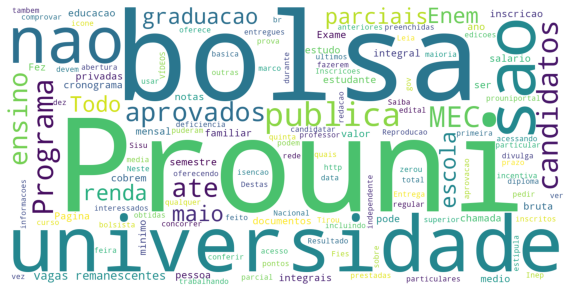

In [18]:
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="white",
                      width=1600, height=800).generate(texto)
 
# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
 
plt.imshow(wordcloud);

# Loop para extender todo o processo realizado acima, inicialmente como exemplo apenas para o itens[9], para todos os itens armazenados na variável itens.

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Pichau\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


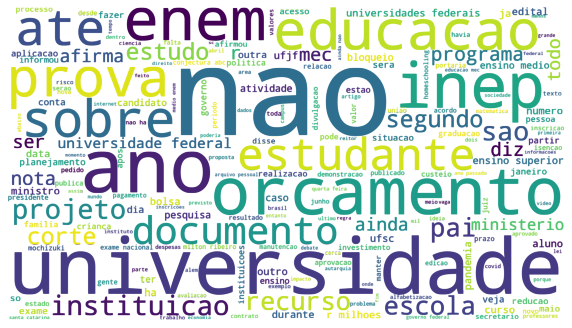

In [7]:
todas_as_noticias = ""
for item in itens:
    
    texto =  BeautifulSoup( str( item.description), "lxml").text.lower()
    
    try:
        texto = texto.split("<br />")[1]
    except:
        texto = texto
            
            
    caracteres = ["\n", "/", "-", "(", ")", ".", ",", ";", ":", "?", "!","\'","”","""
             """, "º","ª", "  ", "   " , "“"]
    vogais_acentuadas = [["á", "a"], ["é", "e"],[ "í", "i"], ["ó", "o"],"""
                    """, ["ú", "u"], ["â", "a"], ["ê", "e"], ["ô", "o"],"""
                    """, ["ã", "a"], ["õ", "o"], ["ü", "u"], ["ç", "c"]]
    
    
    for caracter in caracteres:
        texto = texto.replace( caracter,' ')
    
    for vogais in vogais_acentuadas:
        acentuada = vogais[0]
        nao_acentuada = vogais[1]
        texto = texto.replace( acentuada, nao_acentuada)
        
    todas_as_noticias = todas_as_noticias + texto
 
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('portuguese')

stopwords.extend(["src", "html", "para", "g1", "vai", "tambem"])

wordcloud = WordCloud(stopwords=stopwords,
                      #background_color="white",                  
                      background_color="rgba(255, 255, 255, 0)", ## ---> Fundo Transparente
                      mode="RGBA",                               ## ---> Fundo Transparente 
                      max_words=200,
#                     mask=cand_mask,
                      width=1920, height=1080).generate(todas_as_noticias)
 
# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
 
plt.imshow(wordcloud)
wordcloud.to_file("nuvem.png")